<a href="https://colab.research.google.com/github/sankhauchiha/ML/blob/main/LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mrsimple07/stock-price-prediction")

print("Path to dataset files:", path)

100%|██████████| 17.6k/17.6k [00:00<00:00, 15.4MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/mrsimple07/stock-price-prediction/versions/1


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [5]:
data = pd.read_csv("/root/.cache/kagglehub/datasets/mrsimple07/stock-price-prediction/versions/1/stock_data.csv")

In [8]:
print(data.head())

   Unnamed: 0     Stock_1     Stock_2    Stock_3     Stock_4     Stock_5
0  2020-01-01  101.764052  100.160928  99.494642   99.909756  101.761266
1  2020-01-02  102.171269   99.969968  98.682973  100.640755  102.528643
2  2020-01-03  103.171258   99.575237  98.182139  100.574847  101.887811
3  2020-01-04  105.483215   99.308641  97.149381  100.925017  101.490049
4  2020-01-05  107.453175   98.188428  99.575396  101.594411  101.604283


In [6]:
df = pd.DataFrame(data)
df.rename(columns = {'Unnamed: 0': 'date'}, inplace = True)

In [10]:
df

,date,Stock_1,Stock_2,Stock_3,Stock_4,Stock_5
0,2020-01-01,101.764052,100.160928,99.494642,99.909756,101.761266
1,2020-01-02,102.171269,99.969968,98.682973,100.640755,102.528643
2,2020-01-03,103.171258,99.575237,98.182139,100.574847,101.887811
3,2020-01-04,105.483215,99.308641,97.149381,100.925017,101.490049
4,2020-01-05,107.453175,98.188428,99.575396,101.594411,101.604283
...,...,...,...,...,...,...
360,2020-12-26,92.684784,63.408103,98.288992,117.788079,102.995720
361,2020-12-27,92.688279,62.816639,98.061845,116.605106,102.718260
362,2020-12-28,93.551993,63.597651,96.454800,115.441164,103.566068
363,2020-12-29,93.870037,64.114492,95.747485,113.856107,103.257107


from matplotlib import pyplot as plt
df['Stock_1'].plot(kind='hist', bins=20, title='Stock_1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Stock_2'].plot(kind='hist', bins=20, title='Stock_2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Stock_3'].plot(kind='hist', bins=20, title='Stock_3')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Stock_4'].plot(kind='hist', bins=20, title='Stock_4')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Stock_1', y='Stock_2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Stock_2', y='Stock_3', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Stock_3', y='Stock_4', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Stock_4', y='Stock_5', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['Stock_1']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('Stock_1')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['Stock_2']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('Stock_2')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['Stock_3']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('Stock_3')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['Stock_4']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('Stock_4')

from matplotlib import pyplot as plt
df['Stock_1'].plot(kind='line', figsize=(8, 4), title='Stock_1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Stock_2'].plot(kind='line', figsize=(8, 4), title='Stock_2')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Stock_3'].plot(kind='line', figsize=(8, 4), title='Stock_3')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Stock_4'].plot(kind='line', figsize=(8, 4), title='Stock_4')
plt.gca().spines[['top', 'right']].set_visible(False)

In [11]:
df.describe()

,Stock_1,Stock_2,Stock_3,Stock_4,Stock_5
count,365.000000,365.000000,365.000000,365.000000,365.000000
mean,107.772577,81.105216,94.519502,117.407560,106.866865
std,7.398296,11.435212,6.519213,6.778527,3.760968
min,91.474442,62.414219,81.111434,99.909756,99.833309
25%,101.603117,69.328263,89.788068,112.209912,103.927072
50%,107.421299,84.283525,94.495546,117.788079,106.411328
75%,113.741728,91.548859,99.919465,123.132365,109.178007
max,121.901773,100.160928,107.588373,129.911386,116.243803


In [12]:
df.isnull().sum()

,0
date,0
Stock_1,0
Stock_2,0
Stock_3,0
Stock_4,0
Stock_5,0


In [7]:
# Convert the date column to datetime
df['date'] = pd.to_datetime(df['date'])

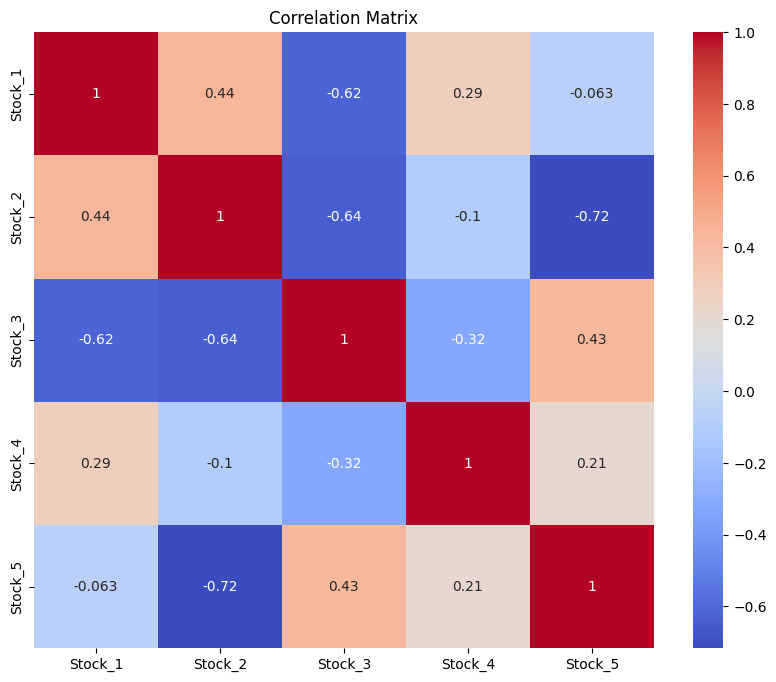

In [8]:
# Drop the date column for correlation calculation
data_for_corr = df.drop(columns=['date'])

# Calculate the correlation matrix
cormap = data_for_corr.corr()

# Plot the heatmap
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(cormap, annot=True, cmap='coolwarm', ax=ax)
plt.title('Correlation Matrix')
plt.show()

In [9]:
def get_corelated_col(cor_dat, threshold):
  feature=[]
  value=[]

  for i ,index in enumerate(cor_dat.index):
    if abs(cor_dat[index]) > threshold:
      feature.append(index)
      value.append(cor_dat[index])

  df = pd.DataFrame(data = value, index = feature, columns=['corr value'])
  return df

In [10]:
top_corelated_values = get_corelated_col(cormap['Stock_2'], 0.60)
top_corelated_values

,corr value
Stock_2,1.000000
Stock_3,-0.644440
Stock_5,-0.716303


In [19]:
df.shape

(365, 6)

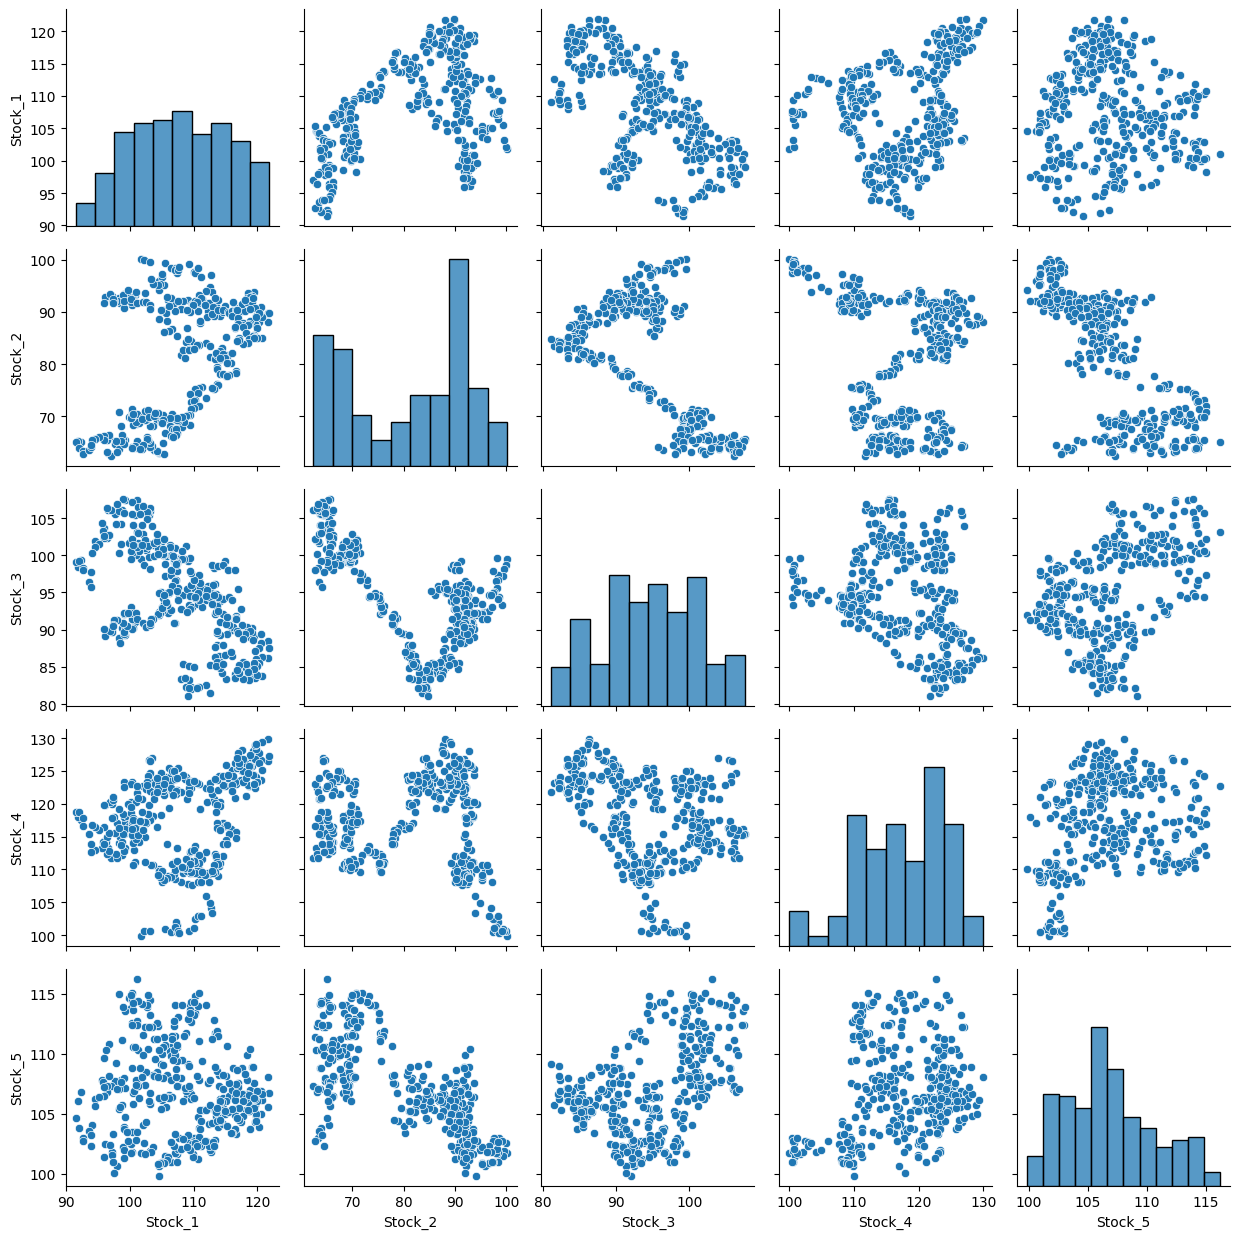

In [20]:
sns.pairplot(df)
plt.tight_layout()

In [11]:
X = df.drop(['Stock_2'], axis=1)
y = df['Stock_2']

In [12]:
X_numeric = X.select_dtypes(include=['number'])  # Select numeric columns only
# Scale the numeric features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_numeric), columns=X_numeric.columns)
X.head()

,date,Stock_1,Stock_3,Stock_4,Stock_5
0,2020-01-01,101.764052,99.494642,99.909756,101.761266
1,2020-01-02,102.171269,98.682973,100.640755,102.528643
2,2020-01-03,103.171258,98.182139,100.574847,101.887811
3,2020-01-04,105.483215,97.149381,100.925017,101.490049
4,2020-01-05,107.453175,99.575396,101.594411,101.604283


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, shuffle=True,random_state=42)

In [14]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
y_pred = model.predict(X_test)

In [18]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R2 Score (R^2): {r2}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

R2 Score (R^2): 0.7439319118637584
Mean Absolute Error (MAE): 5.172938242928456
Root Mean Squared Error (RMSE): 6.147573816425975


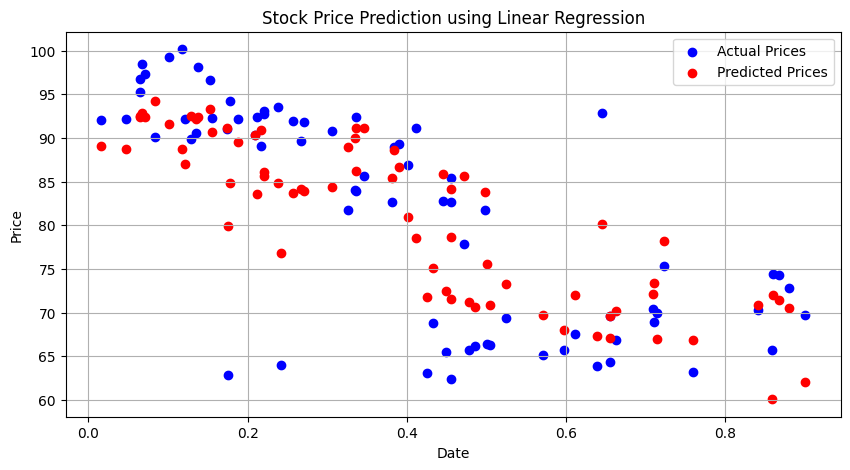

In [24]:
plt.figure(figsize=(10, 5))
plt.scatter(X_test['Stock_5'], y_test, color='blue', label="Actual Prices")
plt.scatter(X_test['Stock_5'], y_pred, color='red', label="Predicted Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.title("Stock Price Prediction using Linear Regression")
plt.grid(True)
plt.show()

In [22]:
X_test

,Stock_1,Stock_3,Stock_4,Stock_5
193,0.544279,0.086657,0.730489,0.497810
33,0.652142,0.519505,0.388484,0.335807
15,0.645892,0.512592,0.098327,0.152339
309,0.425306,0.721495,0.752214,0.758961
57,0.457744,0.466260,0.280700,0.065193
...,...,...,...,...
203,0.784413,0.211513,0.817012,0.325456
82,0.193949,0.361762,0.690993,0.211454
94,0.362009,0.347717,0.744629,0.270882
192,0.586244,0.080202,0.726464,0.445152
